# Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset

In [2]:
dataset_path = '/kaggle/input/global-health-statistics/Global Health Statistics.csv'

# Read the dataset into a DataFrame

In [ ]:
df = pd.read_csv(dataset_path)

# Display the first few rows to understand the structure of the dataset
df.head()

# Basic dataset information
df.info()

# Checking for missing values
df.isnull().sum()

# Summary statistics for numeric columns
df.describe()

# Checking for duplicate rows
df.duplicated().sum()

In [ ]:
df.head()

# Data Preprocessing

In [ ]:
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Disease Name'] = le.fit_transform(df['Disease Name'])
df['Disease Category'] = le.fit_transform(df['Disease Category'])
df['Age Group'] = le.fit_transform(df['Age Group'])
df['Gender'] = le.fit_transform(df['Gender'])

# Visualizing the distribution of diseases globally

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Disease Name')
plt.title('Distribution of Diseases in the Global Health Dataset')
plt.xticks(rotation=90)
plt.show()

# Analyzing Prevalence, Mortality, and Recovery Rates by Disease Category

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Disease Category', y='Prevalence Rate (%)', data=df)
plt.title('Prevalence Rate by Disease Category')
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Disease Category', y='Mortality Rate (%)', data=df)
plt.title('Mortality Rate by Disease Category')
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Disease Category', y='Recovery Rate (%)', data=df)
plt.title('Recovery Rate by Disease Category')
plt.show()

In [ ]:
# Selecting only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Health Indicators')
plt.show()

# Exploring Healthcare Access vs Population Affected

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Healthcare Access (%)', y='Population Affected', data=df, hue='Disease Category', palette='Set1')
plt.title('Healthcare Access vs Population Affected')
plt.show()

# Disease prevalence by continent (based on hypothetical region grouping)

In [ ]:
df['Region'] = np.where(df['Country'] < 10, 'Asia', 
                        np.where(df['Country'] < 20, 'North America', 
                                 np.where(df['Country'] < 30, 'Africa', 
                                          np.where(df['Country'] < 40, 'Europe', 'Other'))))

# Grouping and plotting disease prevalence by region

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Prevalence Rate (%)', data=df)
plt.title('Disease Prevalence by Region')
plt.show()

# Top 5 countries with highest healthcare access

In [ ]:
top_5_countries = df.groupby('Country')['Healthcare Access (%)'].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 Countries with Highest Healthcare Access')
plt.xlabel('Country')
plt.ylabel('Healthcare Access (%)')
plt.show()

# Average treatment cost by disease category

In [ ]:
avg_treatment_cost = df.groupby('Disease Category')['Average Treatment Cost (USD)'].mean()
plt.figure(figsize=(12, 6))
avg_treatment_cost.plot(kind='bar', color='lightgreen')
plt.title('Average Treatment Cost by Disease Category')
plt.xlabel('Disease Category')
plt.ylabel('Average Treatment Cost (USD)')
plt.show()

# Identifying the relationship between income and healthcare access

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Per Capita Income (USD)', y='Healthcare Access (%)', data=df, hue='Region', palette='Set2')
plt.title('Per Capita Income vs Healthcare Access')
plt.show()

## my extension
Simplify one disease one year

In [3]:
df = pd.read_csv(dataset_path)

In [4]:
df

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Italy,2013,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,471007,...,7.58,Medication,21064,No,91.82,4493,2.16,16886,0.79,86.02
1,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318,...,5.11,Surgery,47851,Yes,76.65,2366,4.82,80639,0.74,45.52
2,Turkey,2015,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,154878,...,3.49,Vaccination,27834,Yes,98.55,41,5.81,12245,0.41,40.20
3,Indonesia,2011,Parkinson's Disease,Autoimmune,4.68,6.29,3.99,0-18,Other,446224,...,8.44,Surgery,144,Yes,67.35,3201,2.22,49336,0.49,58.47
4,Italy,2013,Tuberculosis,Genetic,0.83,13.59,7.01,61+,Male,472908,...,5.90,Medication,8908,Yes,50.06,2832,6.93,47701,0.50,48.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,Saudi Arabia,2021,Parkinson's Disease,Infectious,4.56,4.83,9.65,0-18,Female,119332,...,4.23,Vaccination,4528,Yes,92.11,1024,3.88,29335,0.75,27.94
999996,Saudi Arabia,2013,Malaria,Respiratory,0.26,1.76,0.56,0-18,Female,354927,...,6.34,Surgery,20686,No,84.47,202,7.95,30752,0.47,77.66
999997,USA,2016,Zika,Respiratory,13.44,14.13,1.91,19-35,Other,807915,...,8.11,Therapy,18807,No,86.81,3338,7.31,62897,0.72,46.90
999998,Nigeria,2020,Asthma,Chronic,1.96,14.56,4.98,61+,Female,385896,...,6.91,Medication,21033,Yes,62.15,4806,3.82,98189,0.51,34.73


In [5]:
td=df.loc[(df['Disease Name']=='Malaria')
& (df['Disease Category']=='Bacterial')]

In [ ]:
td

In [6]:
td.columns

Index(['Country', 'Year', 'Disease Name', 'Disease Category',
       'Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)',
       'Age Group', 'Gender', 'Population Affected', 'Healthcare Access (%)',
       'Doctors per 1000', 'Hospital Beds per 1000', 'Treatment Type',
       'Average Treatment Cost (USD)', 'Availability of Vaccines/Treatment',
       'Recovery Rate (%)', 'DALYs', 'Improvement in 5 Years (%)',
       'Per Capita Income (USD)', 'Education Index', 'Urbanization Rate (%)'],
      dtype='object')

In [6]:
td1=td.iloc[:,0:10]

In [7]:
td1['Prevalent Cases']=td1['Prevalence Rate (%)']*td1['Population Affected']/100
td1['Incident Cases']=td1['Incidence Rate (%)']*td1['Population Affected']/100
td1['Deaths']=td1['Mortality Rate (%)']*td1['Population Affected']/100

In [11]:
aggregated_df = td1.groupby(['Year', 'Country'], as_index=False)['Incident Cases'].sum()


In [8]:
td1

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,Prevalent Cases,Incident Cases,Deaths
22,South Africa,2014,Malaria,Bacterial,5.94,4.29,2.36,61+,Female,857183,50916.6702,36773.1507,20229.5188
485,Nigeria,2020,Malaria,Bacterial,18.91,13.31,1.37,61+,Female,706579,133614.0889,94045.6649,9680.1323
736,Argentina,2007,Malaria,Bacterial,3.73,2.05,5.29,0-18,Male,256725,9575.8425,5262.8625,13580.7525
1247,Turkey,2004,Malaria,Bacterial,15.95,2.02,0.19,19-35,Male,326191,52027.4645,6589.0582,619.7629
1578,Argentina,2005,Malaria,Bacterial,7.04,0.11,5.86,61+,Female,123879,8721.0816,136.2669,7259.3094
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997955,Saudi Arabia,2006,Malaria,Bacterial,14.41,9.23,3.70,36-60,Female,190621,27468.4861,17594.3183,7052.9770
998040,Germany,2018,Malaria,Bacterial,0.28,8.40,3.13,0-18,Female,604545,1692.7260,50781.7800,18922.2585
998438,Mexico,2013,Malaria,Bacterial,4.21,11.34,6.52,19-35,Female,492221,20722.5041,55817.8614,32092.8092
999144,Indonesia,2024,Malaria,Bacterial,1.30,7.92,0.34,19-35,Other,6865,89.2450,543.7080,23.3410


NameError: name 'disease_name' is not defined

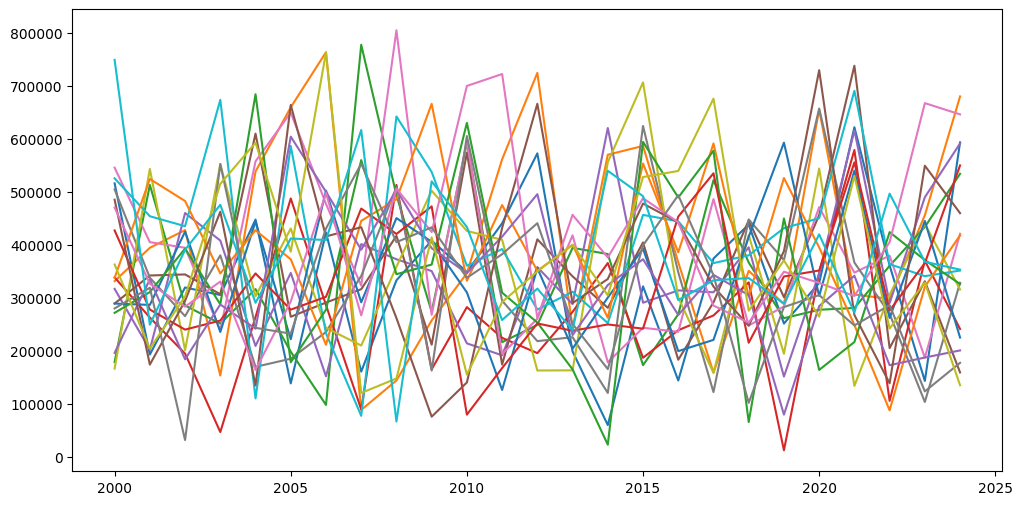

In [12]:
pivot_df = aggregated_df.pivot(index='Year', columns='Country', values='Incident Cases')

# Plot the data
plt.figure(figsize=(12, 6))
for country in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[country], label=country)

plt.title(f"Evolution of {disease_name} in All Countries", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Cases", fontsize=12)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
a=td1.groupby(['Country','Year','Gender'])

In [23]:
m=a[['Population Affected','Prevalent Cases','Incident Cases','Deaths']]

In [24]:
m

In [26]:
a['Prevalent Cases'].sum()/a['Population Affected'].sum()*100

Country    Year  Gender
Argentina  2000  Female    13.898729
                 Male       7.705891
                 Other     10.747899
           2001  Female     5.727600
                 Male      17.938051
                             ...    
USA        2023  Male      17.245796
                 Other     11.880511
           2024  Female    15.190000
                 Male      11.686337
                 Other      5.362768
Length: 1426, dtype: float64

In [1]:
a['Incident Cases'].plot()


KeyboardInterrupt



In [ ]:
td[td['Country']=='USA'].sort_values(by=['Year','Age Group'])

In [ ]:
# make function to calculate rate
def prev_rate(gender_flag=1,):